In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("/content/UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape

(1156, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

<ipython-input-5-eb49c4d16340>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     errors='coerce')

In [7]:
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

<ipython-input-22-9fdf625a0ea9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY', data=dataset, palette=custom_palette)


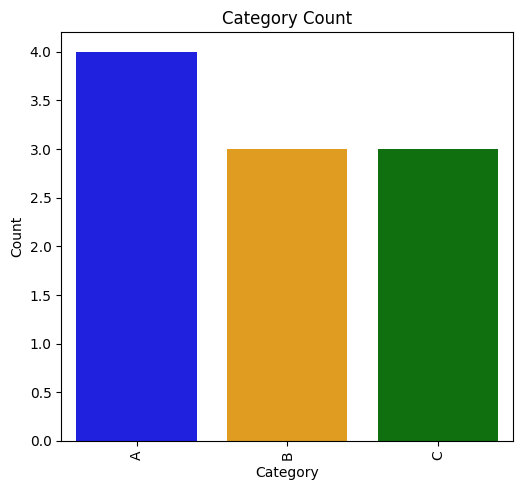

In [22]:

data = {
    'CATEGORY': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'C', 'A']
}
dataset = pd.DataFrame(data)

custom_palette = {
    'A': 'blue',
    'B': 'orange',
    'C': 'green'
}

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='CATEGORY', data=dataset, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-21-27e5a0d560df>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PURPOSE', data=dataset, palette=custom_palette)  # Apply custom colors


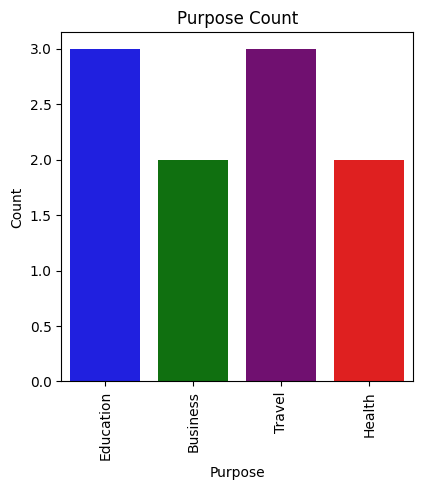

In [21]:
data = {
    'PURPOSE': ['Education', 'Business', 'Travel', 'Health', 'Education',
                'Business', 'Travel', 'Health', 'Education', 'Travel']
}
dataset = pd.DataFrame(data)
custom_palette = {
    'Education': 'blue',
    'Business': 'green',
    'Travel': 'purple',
    'Health': 'red'
}

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='PURPOSE', data=dataset, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Purpose Count')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<ipython-input-20-eafea68a294a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day-night', data=dataset, palette=custom_palette)  # Apply custom colors


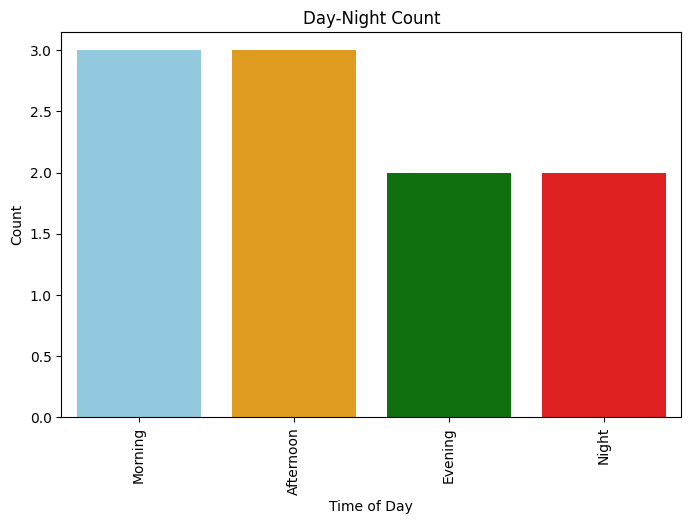

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset creation (replace this with your actual dataset)
data = {
    'day-night': ['Morning', 'Afternoon', 'Evening', 'Night', 'Morning',
                  'Afternoon', 'Evening', 'Night', 'Morning', 'Afternoon']
}
dataset = pd.DataFrame(data)

# Define custom colors for each category
custom_palette = {
    'Morning': 'skyblue',
    'Afternoon': 'orange',
    'Evening': 'green',
    'Night': 'red'
}

# Correct code for countplot with different colors
plt.figure(figsize=(8, 5))  # Adjust figure size for better readability
sns.countplot(x='day-night', data=dataset, palette=custom_palette)  # Apply custom colors
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Day-Night Count')  # Add a title
plt.xlabel('Time of Day')  # Label for the x-axis
plt.ylabel('Count')  # Label for the y-axis
plt.show()


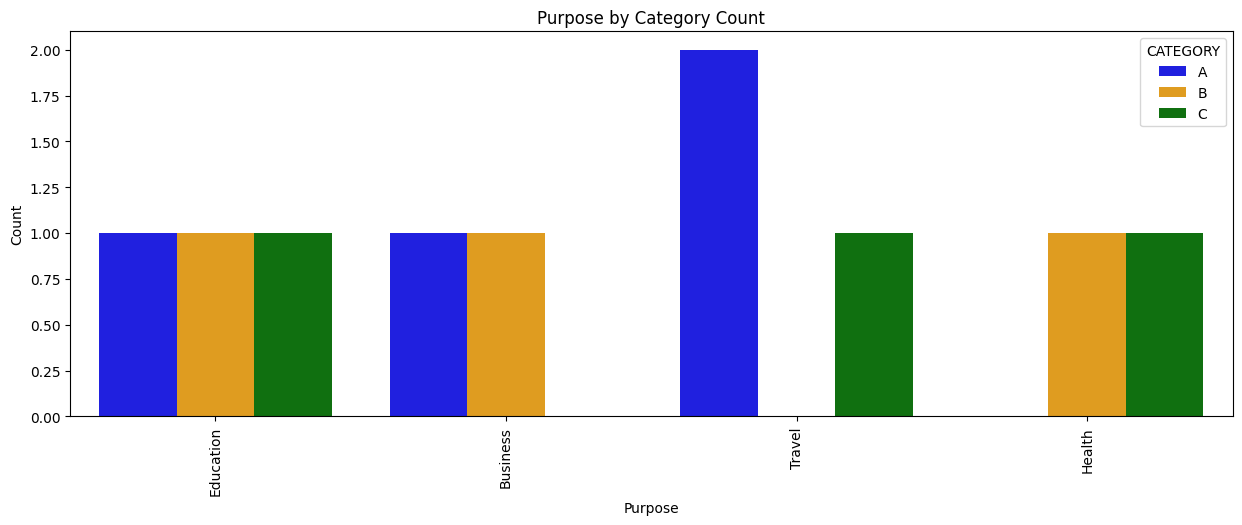

In [24]:
data = {
    'PURPOSE': ['Education', 'Business', 'Travel', 'Health', 'Education',
                'Business', 'Travel', 'Health', 'Education', 'Travel'],
    'CATEGORY': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'C', 'A']
}
dataset = pd.DataFrame(data)

custom_palette = {
    'A': 'blue',
    'B': 'orange',
    'C': 'green'
}
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY', palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Purpose by Category Count')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()


In [26]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example dataset creation (replace this with your actual dataset)
data = {
    'CATEGORY': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'C', 'A'],
    'PURPOSE': ['Education', 'Business', 'Travel', 'Health', 'Education',
                'Business', 'Travel', 'Health', 'Education', 'Travel']
}
dataset = pd.DataFrame(data)

# Columns to encode
object_cols = ['CATEGORY', 'PURPOSE']

# Initialize OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Use `sparse_output` instead of `sparse` in newer versions of sklearn

# Perform one-hot encoding
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]),
                       index=dataset.index,
                       columns=OH_encoder.get_feature_names_out(object_cols))

# Drop original columns and concatenate the encoded ones
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)

# Display the transformed dataset
print(dataset)


   CATEGORY_A  CATEGORY_B  CATEGORY_C  PURPOSE_Business  PURPOSE_Education  \
0         1.0         0.0         0.0               0.0                1.0   
1         0.0         1.0         0.0               1.0                0.0   
2         1.0         0.0         0.0               0.0                0.0   
3         0.0         0.0         1.0               0.0                0.0   
4         0.0         1.0         0.0               0.0                1.0   
5         1.0         0.0         0.0               1.0                0.0   
6         0.0         0.0         1.0               0.0                0.0   
7         0.0         1.0         0.0               0.0                0.0   
8         0.0         0.0         1.0               0.0                1.0   
9         1.0         0.0         0.0               0.0                0.0   

   PURPOSE_Health  PURPOSE_Travel  
0             0.0             0.0  
1             0.0             0.0  
2             0.0             1.0

<Axes: >

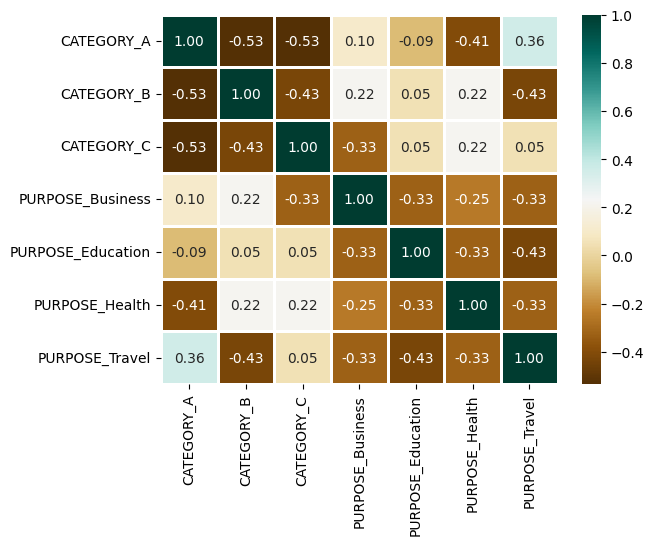

In [27]:
# Select only numerical columns for correlation calculation
numeric_dataset = dataset.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)


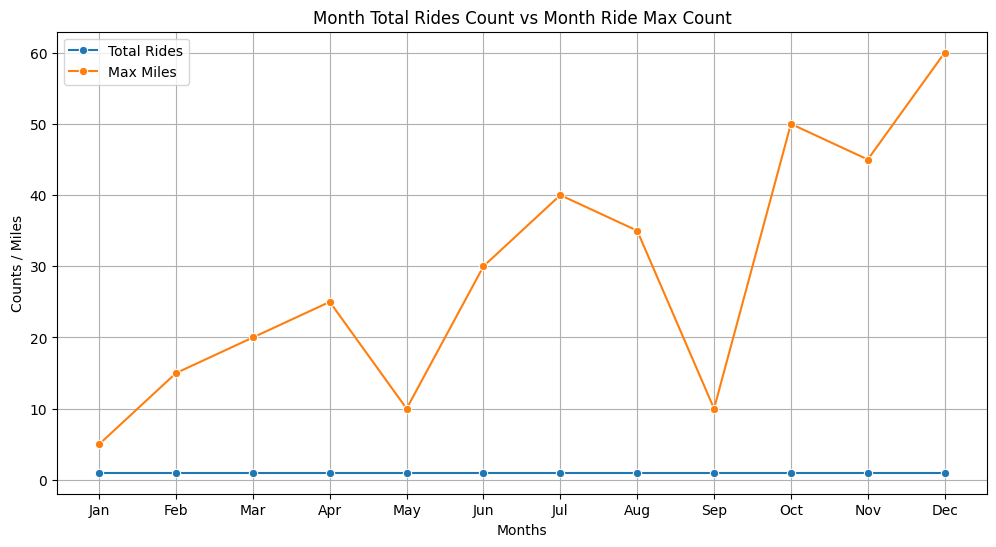

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset creation (replace this with your actual dataset)
data = {
    'START_DATE': ['2024-01-15', '2024-02-20', '2024-03-10', '2024-04-25',
                   '2024-05-14', '2024-06-30', '2024-07-04', '2024-08-19',
                   '2024-09-05', '2024-10-10', '2024-11-23', '2024-12-31'],
    'MILES': [5, 15, 20, 25, 10, 30, 40, 35, 10, 50, 45, 60]
}
dataset = pd.DataFrame(data)
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'])  # Convert START_DATE to datetime

# Extract month and map to labels
dataset['MONTH'] = dataset['START_DATE'].dt.month
month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
dataset['MONTH'] = dataset['MONTH'].map(month_label)

# Get total ride counts for each month
mon = dataset['MONTH'].value_counts(sort=False)

# Get maximum 'MILES' value for each month
max_miles_per_month = dataset.groupby('MONTH', sort=False)['MILES'].max()

# Create a DataFrame for plotting
df = pd.DataFrame({
    "MONTHS": list(mon.index),
    "TOTAL RIDES": mon.values,
    "MAX MILES": max_miles_per_month.values
})

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="MONTHS", y="TOTAL RIDES", label="Total Rides", marker="o")
sns.lineplot(data=df, x="MONTHS", y="MAX MILES", label="Max Miles", marker="o")
plt.xlabel("Months")
plt.ylabel("Counts / Miles")
plt.title("Month Total Rides Count vs Month Ride Max Count")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

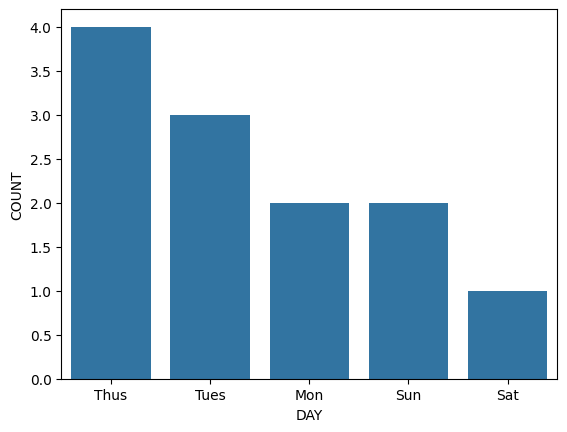

In [31]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

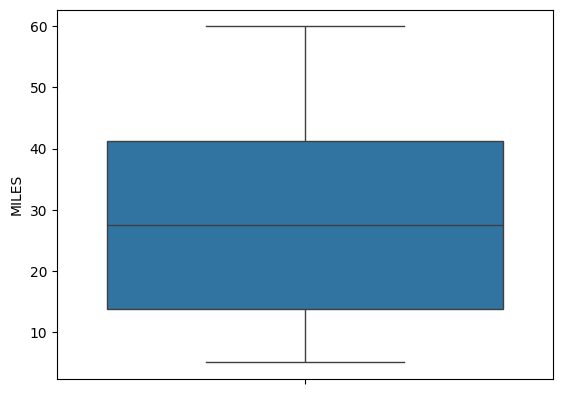

In [32]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

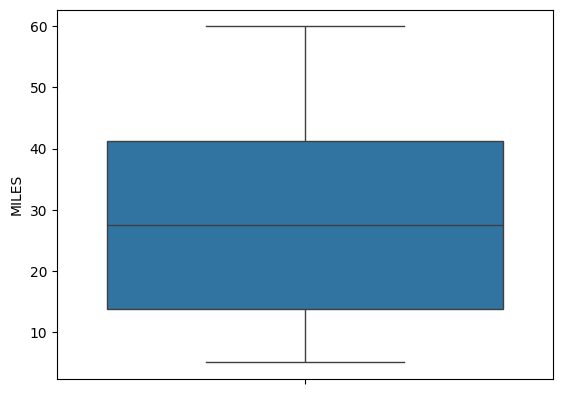

In [33]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<ipython-input-34-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

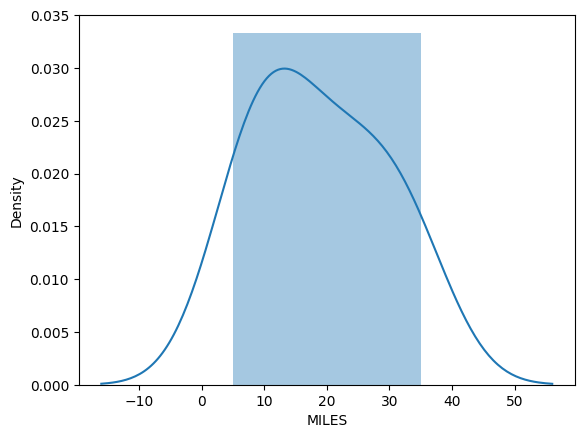

In [34]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])